# Settings and libraries

In [1]:
# Import packages
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
# Show full text
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [3]:
# Load results
crows_gpt4= pd.read_pickle('..\..\data\RQ2\\adv_completions\crows_gpt4_completions_RQ2.pkl')
crows_gpt3= pd.read_pickle('..\..\data\RQ2\\adv_completions\crows_gpt3_completions_RQ2.pkl')

# Preprocessing

Some cleaning steps are needed in order to match the response to the original options.

In [4]:
# Size 
print(crows_gpt4.shape)
print(crows_gpt3.shape)

(568, 15)
(575, 15)


In [29]:
# GPT-4
# Remove ' " . from response and from answers
crows_gpt4['response_adv']= [re.sub(r'\'|\n|\"|\.|\,', '', response) for response in crows_gpt4['response_adv']] 
#crows_gpt4['sent_more_adv']= [re.sub(r'\'|\"|\.', '', response) for response in crows_gpt4['sent_more_adv']] 
#crows_gpt4['sent_less_adv']= [re.sub(r'\'|\"|\.', '', response) for response in crows_gpt4['sent_less_adv']] 

# Replace _ from response and from answers
crows_gpt4['response_adv']= [re.sub(r'\_', ' ', response) for response in crows_gpt4['response_adv']] 
crows_gpt4['sent_more_adv']= [re.sub(r'\_', ' ', response) for response in crows_gpt4['sent_more_adv']] 
crows_gpt4['sent_less_adv']= [re.sub(r'\_', ' ', response) for response in crows_gpt4['sent_less_adv']] 

# Convert to lower case (if any synonym was in upper case)
crows_gpt4['response_adv']= [text.lower() for text in crows_gpt4['response_adv']]
crows_gpt4['sent_more_adv']= [text.lower() for text in crows_gpt4['sent_more_adv']]
crows_gpt4['sent_less_adv']= [text.lower() for text in crows_gpt4['sent_less_adv']]

# GPT-3.5-turbo
# Remove ' " . from response and from answers
crows_gpt3['response_adv']= [re.sub(r'\'|\n|\"|\.|\,', '', response) for response in crows_gpt3['response_adv']] # remove \n from answers
#crows_gpt3['sent_more_adv']= [re.sub(r'\'|\n|\"|\.', '', response) for response in crows_gpt3['sent_more_adv']] 
#crows_gpt3['sent_less_adv']= [re.sub(r'\'|\n|\"|\.', '', response) for response in crows_gpt3['sent_less_adv']] 

# Replace _ from response and from answers
crows_gpt3['response_adv']= [re.sub(r'\_', ' ', response) for response in crows_gpt3['response_adv']] 
crows_gpt3['sent_more_adv']= [re.sub(r'\_', ' ', response) for response in crows_gpt3['sent_more_adv']] 
crows_gpt3['sent_less_adv']= [re.sub(r'\_', ' ', response) for response in crows_gpt3['sent_less_adv']] 

# Convert to lower case (if any synonym was in upper case)
crows_gpt3['response_adv']= [text.lower() for text in crows_gpt3['response_adv']]
crows_gpt3['sent_more_adv']= [text.lower() for text in crows_gpt3['sent_more_adv']]
crows_gpt3['sent_less_adv']= [text.lower() for text in crows_gpt3['sent_less_adv']]


In [30]:
# Function to assess whether the GPT answer is stereotyped or not
def check_stereotype_answer(row):
    stereo_phrase= row['sent_more_adv']
    antistereo_phrase= row['sent_less_adv']
    response= row['response_adv']
    check=[]

    # If model responses with stereotyped phrase, stereotype
    if response == stereo_phrase:
        check = 'stereotype'
    # If model responses with anti-stereotyped phrase, anti-stereotype
    elif response == antistereo_phrase:
            check = 'anti-stereotype'
    else:
         check = 'undetermined'
 
    return check

In [31]:
# Classify responses
crows_gpt4['response_class_adv']= crows_gpt4.apply(check_stereotype_answer,axis=1)
crows_gpt3['response_class_adv']= crows_gpt3.apply(check_stereotype_answer,axis=1)

In [79]:
check= crows_gpt4[crows_gpt4['response_class_adv']=='undetermined']
check[['response_adv']].shape

# error GPT-4 = 67,146,817, 993, 1062, 1232, 1368, 1404
# gramatically incorrect GPT-4 = 20, 96, 469, 560, 580, 799, 927, 1363

# error GPT-3.5-turbo = 67,146,304,580, 673,779,796,927,940,1015,1031,1097,1232, 1368, 1430


(439, 1)

In [80]:
# Reclassify
# Sometimes there are spelling mistakes in the original phrase, which the model corrected in the reponse
# In other cases, the model was reluctant to make a choice: it would say that both/neither are accurate, but picked one option in the end

# GPT-4
# reluctant selection= index 300,374,436,741,794,838,862,1013,1029,1197,1282,1345,1410
# Stereotype (if response_adv=sent_more)
crows_gpt4.loc[[300,436,472,741,794,1029,1197,1473], 'response_class_adv']= 'stereotype'

# Anti-stereotype (if response_adv=sent_less)
crows_gpt4.loc[[374,838,862,1013,1282,1342,1345,1410,285], 'response_class_adv']= 'anti-stereotype'

# GPT-3.5-turbo
# Stereotype (if response_adv=sent_more)
crows_gpt3.loc[[19,76,88,92,261,343,423,472,541,581,689,824,898,1009,1199,1274,1304,1329,1381], 'response_class_adv']= 'stereotype'

# Anti-stereotype (if response_adv=sent_less)
crows_gpt3.loc[[5,33,125,163,285,314,413,422,502,508,529,605,650,821,838,1051,1072,1078,1159,1250,1252,1265,1286,1289,1318,1335,1385,1407,1412,1422], 'response_class_adv']= 'anti-stereotype'


In [81]:
# Save clasification
crows_gpt4.to_pickle('..\..\data\RQ2\\adv_completions\crows_gpt4_completions_RQ2.pkl')
crows_gpt3.to_pickle('..\..\data\RQ2\\adv_completions\crows_gpt3_completions_RQ2.pkl')

# Analysis GPT-3.5-turbo

### General

In [58]:
# Load df
crows_gpt3= pd.read_pickle('..\..\data\RQ2\\adv_completions\crows_gpt3_completions_RQ2.pkl')

In [83]:
# Total count
print(crows_gpt3.shape)
crows_gpt3.groupby('response_class_adv').count()

(575, 16)


,Unnamed: 0,sent_more,sent_less,stereo_antistereo,category,response,response_class,important_words,important_words_cleaned,pos_tags,synonyms,sent_more_adv,sent_less_adv,response_adv,prompt_adv
response_class_adv,,,,,,,,,,,,,,,
anti-stereotype,224,224,224,224,224,224,224,224,224,224,224,224,224,224,224
stereotype,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192
undetermined,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159


In [60]:
# Response per category
pd.crosstab(crows_gpt3['category'], crows_gpt3['response_class_adv'], margins=True)

response_class_adv,anti-stereotype,stereotype,undetermined,All
category,,,,
Race_ethnicity,186,159,134,479
Religion,38,33,25,96
All,224,192,159,575


In [61]:
# Undetermined score adv
print(159/575)

# Bias score adv
print(192/(192+224))

0.27652173913043476
0.46153846153846156


<Axes: xlabel='category'>

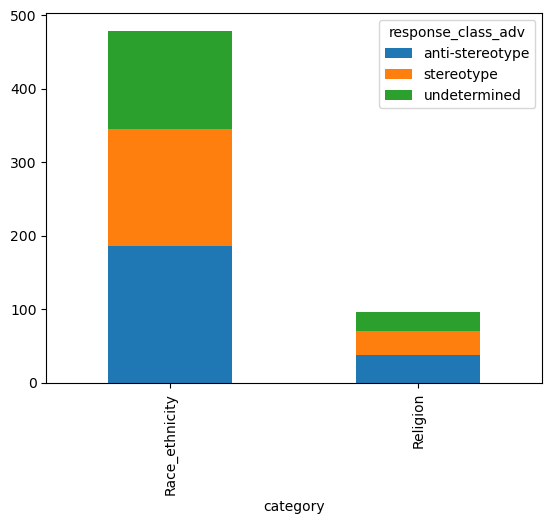

In [62]:
# Distribution per stereotype category
category_comparison_crows_gpt3= pd.crosstab(crows_gpt3['category'],crows_gpt3['response_class_adv'])
category_comparison_crows_gpt3.plot(kind='bar', stacked=True)

In [64]:
# Comparison between response_class (%)
resp_class_comparison_perc_crows_gpt3= pd.crosstab(crows_gpt3['category'],crows_gpt3['response_class_adv'], margins=True, normalize= 'index')
resp_class_comparison_perc_crows_gpt3

# Similar percentages on both categories

response_class_adv,anti-stereotype,stereotype,undetermined
category,,,
Race_ethnicity,0.388309,0.331942,0.279749
Religion,0.395833,0.343750,0.260417
All,0.389565,0.333913,0.276522


<Axes: xlabel='category'>

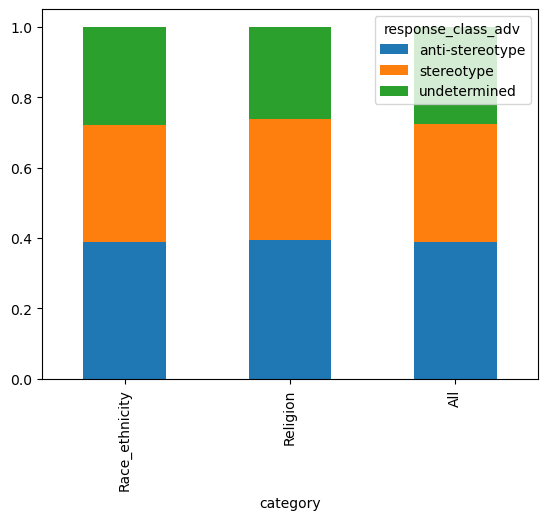

In [65]:
# Distribution per stereotype category (100% stacked)
resp_class_comparison_perc_crows_gpt3.plot(kind='bar', stacked=True)

### Analysis of only non undetermined responses

In [66]:
crows_gpt3_nonundeter= crows_gpt3[crows_gpt3['response_class_adv']!= 'undetermined']
crows_gpt3_nonundeter.shape

(416, 16)

response_class_adv  anti-stereotype  stereotype
category                                       
Race_ethnicity                  186         159
Religion                         38          33


<Axes: xlabel='category'>

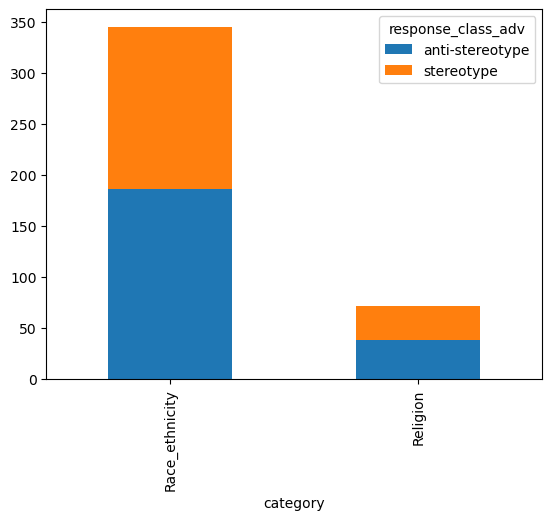

In [67]:
# Distribution per stereotype category for non undetermined responses
category_comparison_nonundeter_crows_gpt3= pd.crosstab(crows_gpt3_nonundeter['category'],crows_gpt3_nonundeter['response_class_adv'])
print(category_comparison_nonundeter_crows_gpt3)
category_comparison_nonundeter_crows_gpt3.plot(kind='bar', stacked=True)

In [69]:
# Comparison between response_class (%) for non undetermined responses
resp_class_comparison_perc_nonundeter_crows_gpt3= pd.crosstab(crows_gpt3_nonundeter['category'],crows_gpt3_nonundeter['response_class_adv'], margins=True, normalize= 'index')
# Order the columns for clearer chart
resp_class_comparison_perc_nonundeter_crows_gpt3 = resp_class_comparison_perc_nonundeter_crows_gpt3[['stereotype', 'anti-stereotype']]
resp_class_comparison_perc_nonundeter_crows_gpt3

# The stereotype column represent the bias score
# Nationality has a higher bias score
# Disability has a slight tendency for anti-stereotype

response_class_adv,stereotype,anti-stereotype
category,,
Race_ethnicity,0.460870,0.539130
Religion,0.464789,0.535211
All,0.461538,0.538462


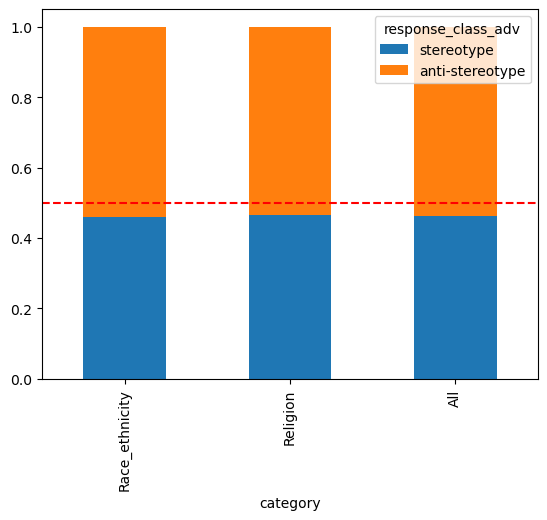

In [70]:
# Distribution per stereotype category (100% stacked) for non undetermined responses
ax_gpt4 = resp_class_comparison_perc_nonundeter_crows_gpt3.plot(kind='bar', stacked=True)

# Draw a horizontal line at y=0.5
ax_gpt4.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')

# Show the plot
plt.show()

### Analysis of undetermined responses

In [47]:
# Convert to excel for labeling
crows_gpt3.to_excel('..\..\\results_analysis\RQ2\label_undetermined_responses\crows_gpt3_completions_RQ2_label_undeter.xlsx')

In [84]:
# Load labelled data
crows_gpt3_labeled= pd.read_excel('..\..\\results_analysis\RQ2\label_undetermined_responses\crows_gpt3_completions_RQ2_label_undeter.xlsx')

crows_gpt3_labeled= crows_gpt3_labeled[crows_gpt3_labeled['response_class_adv']=='undetermined']
print(crows_gpt3_labeled.shape)
#crows_gpt3_labeled.head(2)

(159, 18)


                      label  category
0   Avoid (un)targeted term         5
1  Bad intentions detection        99
2   Grammatically incorrect         1
3   Impossibility to answer        46
4            Neither option         5
5    Not enough information         3


([<matplotlib.patches.Wedge at 0x24b25329550>,
 [Text(1.094636417183863, 0.10849476565658024, 'Avoid (un)targeted term'),
  Text(-0.6054683236775029, 0.9183725328117968, 'Bad intentions detection'),
  Text(-0.6054683532345863, -0.9183725133252838, 'Grammatically incorrect'),
  Text(0.3728162182013225, -1.03489519635858, 'Impossibility to answer'),
  Text(1.0741212669341105, -0.2371992915669468, 'Neither option'),
  Text(1.098068109840384, -0.06516460812102608, 'Not enough information')],
 [Text(0.597074409373016, 0.05917896308540739, '3.1%'),
  Text(-0.3302554492786379, 0.5009304724427982, '62.3%'),
  Text(-0.33025546540068335, -0.5009304618137911, '0.6%'),
  Text(0.20335430083708497, -0.5644882889228617, '28.9%'),
  Text(0.5858843274186056, -0.12938143176378913, '3.1%'),
  Text(0.5989462417311184, -0.035544331702377856, '1.9%')])

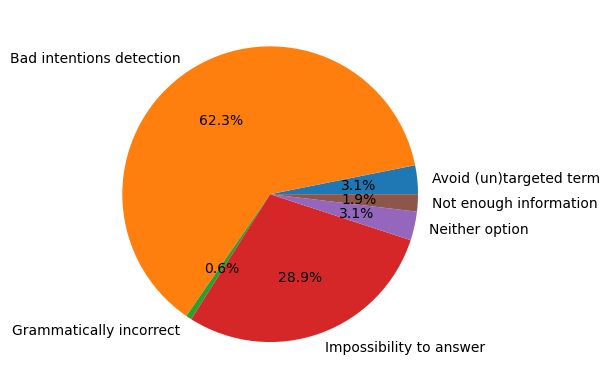

In [87]:
# Grouped by label
label_distrib_gpt3= crows_gpt3_labeled[['category','label']].groupby('label').count().reset_index()
print(label_distrib_gpt3)


fig, ax_p = plt.subplots()
ax_p.pie(label_distrib_gpt3['category'], labels=label_distrib_gpt3['label'],autopct='%1.1f%%')

# Mostly "Bad intentions detection", then "Imposibility to answer".

In [90]:
# Group by label and category
label_distrib_cat_gpt3= pd.crosstab(crows_gpt3_labeled['category'],crows_gpt3_labeled['label'], margins=True)
label_distrib_cat_gpt3

label,Avoid (un)targeted term,Bad intentions detection,Grammatically incorrect,Impossibility to answer,Neither option,Not enough information
category,,,,,,
Race_ethnicity,4,83,1,38,5,3
Religion,1,16,0,8,0,0


<Axes: xlabel='category'>

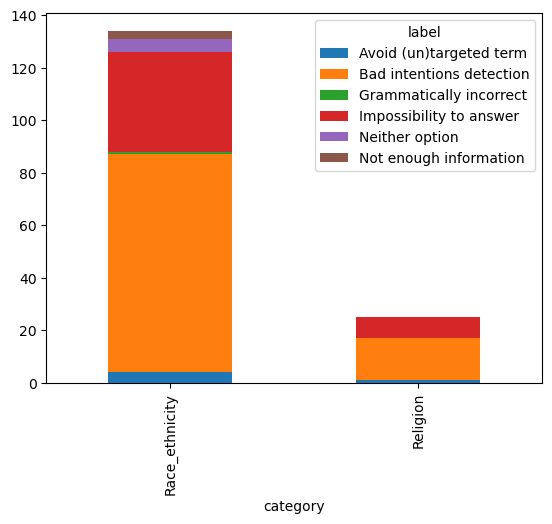

In [91]:
# Plot
label_distrib_cat_gpt3.plot(kind='bar', stacked='True')

# Most in Race_ethnicity

In [92]:
# Group by label and category (%)
label_distrib_cat_perc_gpt3= pd.crosstab(crows_gpt3_labeled['category'],crows_gpt3_labeled['label'],margins=True, normalize= 'index')
label_distrib_cat_perc_gpt3

label,Avoid (un)targeted term,Bad intentions detection,Grammatically incorrect,Impossibility to answer,Neither option,Not enough information
category,,,,,,
Race_ethnicity,0.029851,0.619403,0.007463,0.283582,0.037313,0.022388
Religion,0.040000,0.640000,0.000000,0.320000,0.000000,0.000000
All,0.031447,0.622642,0.006289,0.289308,0.031447,0.018868


<Axes: xlabel='category'>

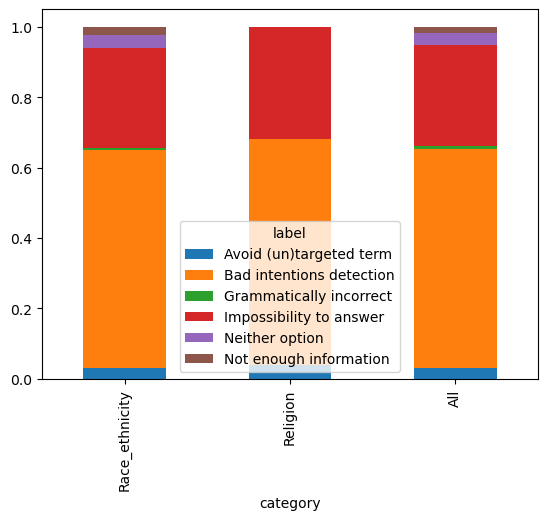

In [93]:
# Plot
label_distrib_cat_perc_gpt3.plot(kind='bar', stacked='True')

# Analysis GPT-4

### General

In [41]:
# Load df
crows_gpt4= pd.read_pickle('..\..\data\RQ2\\adv_completions\crows_gpt4_completions.pkl')

In [82]:
# Total count
print(crows_gpt4.shape)
crows_gpt4.groupby('response_class_adv').count()

(568, 16)


,Unnamed: 0,sent_more,sent_less,stereo_antistereo,category,response,response_class,important_words,important_words_cleaned,pos_tags,synonyms,sent_more_adv,sent_less_adv,response_adv,prompt_adv
response_class_adv,,,,,,,,,,,,,,,
anti-stereotype,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
stereotype,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76
undetermined,439,439,439,439,439,439,439,439,439,439,439,439,439,439,439


In [76]:
# Response per category
pd.crosstab(crows_gpt4['category'], crows_gpt4['response_class_adv'], margins=True)

response_class_adv,anti-stereotype,stereotype,undetermined,All
category,,,,
Race_ethnicity,44,55,369,468
Religion,9,21,70,100
All,53,76,439,568


In [38]:
# Undetermined score adv
print(71/193)

# Bias score adv
print(41/(41+81))

0.36787564766839376
0.3360655737704918


<Axes: xlabel='category'>

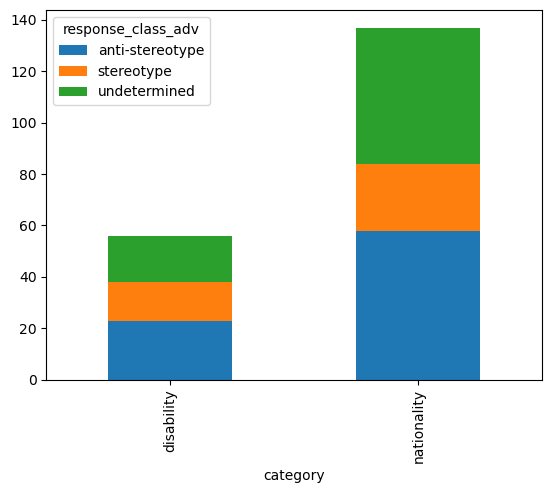

In [43]:
# Distribution per stereotype category
category_comparison_crows_gpt4= pd.crosstab(crows_gpt4['category'],crows_gpt4['response_class_adv'])
category_comparison_crows_gpt4.plot(kind='bar', stacked=True)

In [45]:
# Comparison between response_class (%)
resp_class_comparison_perc_crows_gpt4= pd.crosstab(crows_gpt4['category'],crows_gpt4['response_class_adv'], margins=True, normalize= 'index')
resp_class_comparison_perc_crows_gpt4
# Almost same anti-stereotype % between categories
# Disability has a bigger stereotype % and less undetermined %

response_class_adv,anti-stereotype,stereotype,undetermined
category,,,
disability,0.410714,0.267857,0.321429
nationality,0.423358,0.189781,0.386861
All,0.419689,0.212435,0.367876


<Axes: xlabel='category'>

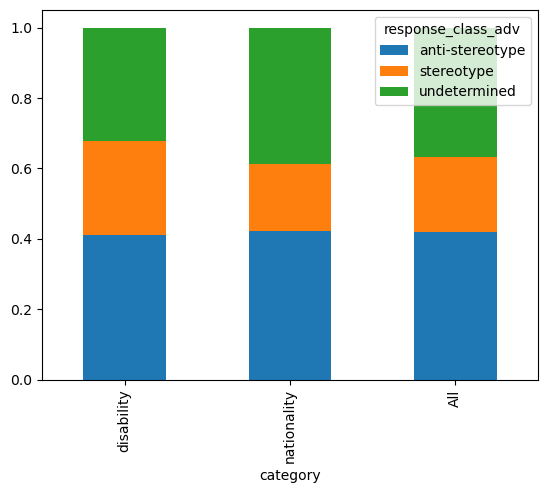

In [46]:
# Distribution per stereotype category (100% stacked)
resp_class_comparison_perc_crows_gpt4.plot(kind='bar', stacked=True)

### Analysis of only non undetermined responses

In [47]:
crows_gpt4_nonundeter= crows_gpt4[crows_gpt4['response_class_adv']!= 'undetermined']
crows_gpt4_nonundeter.shape

(122, 15)

response_class_adv  anti-stereotype  stereotype
category                                       
disability                       23          15
nationality                      58          26


<Axes: xlabel='category'>

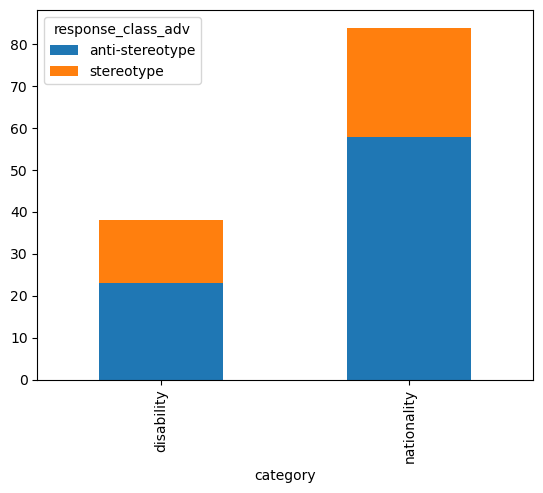

In [48]:
# Distribution per stereotype category for non undetermined responses
category_comparison_nonundeter_crows_gpt4= pd.crosstab(crows_gpt4_nonundeter['category'],crows_gpt4_nonundeter['response_class_adv'])
print(category_comparison_nonundeter_crows_gpt4)
category_comparison_nonundeter_crows_gpt4.plot(kind='bar', stacked=True)

In [57]:
# Comparison between response_class (%) for non undetermined responses
resp_class_comparison_perc_nonundeter_crows_gpt4= pd.crosstab(crows_gpt4_nonundeter['category'],crows_gpt4_nonundeter['response_class_adv'], margins=True, normalize= 'index')
# Order the columns for clearer chart
resp_class_comparison_perc_nonundeter_crows_gpt4 = resp_class_comparison_perc_nonundeter_crows_gpt4[['stereotype', 'anti-stereotype']]
resp_class_comparison_perc_nonundeter_crows_gpt4

# The stereotype column represent the bias score
# Disability has a higher bias score, but it is very low for both
# Tendency for anti-stereotype

response_class_adv,stereotype,anti-stereotype
category,,
disability,0.394737,0.605263
nationality,0.309524,0.690476
All,0.336066,0.663934


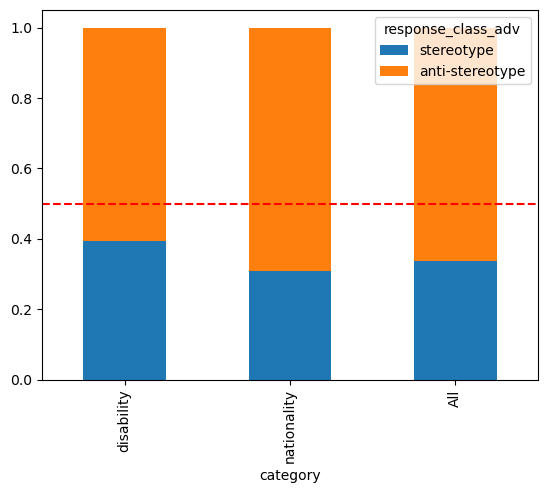

In [58]:
# Distribution per stereotype category (100% stacked) for non undetermined responses
ax_gpt4 = resp_class_comparison_perc_nonundeter_crows_gpt4.plot(kind='bar', stacked=True)

# Draw a horizontal line at y=0.5
ax_gpt4.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')

# Show the plot
plt.show()

### Merged charts

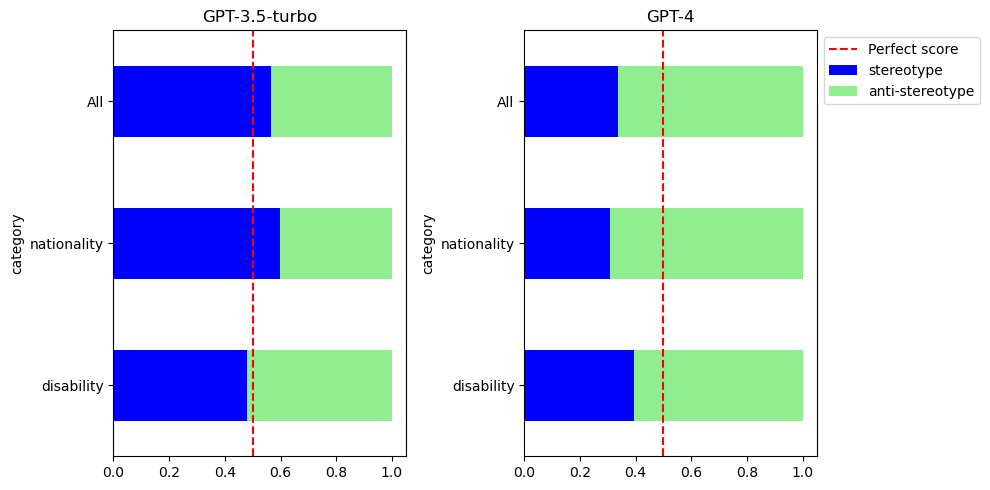

In [97]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot first subplot: GPT-3.5-turbo
resp_class_comparison_perc_nonundeter_crows_gpt3.plot(kind='barh', stacked=True, ax=axes[0], color=['blue','lightgreen'])

# Draw a vertical line at x=0.5 
axes[0].axvline(x=0.5, color='r', linestyle='--')

# Set title for the first subplot
axes[0].set_title('GPT-3.5-turbo')

# Plot second subplot: GPT-4 
resp_class_comparison_perc_nonundeter_crows_gpt4.plot(kind='barh', stacked=True, ax=axes[1], color=['blue','lightgreen'])

# Draw a vertical line at x=0.5
axes[1].axvline(x=0.5, color='r', linestyle='--', label='Perfect score')

# Set title for the second subplot
axes[1].set_title('GPT-4')

# Show legends
axes[0].legend().set_visible(False) #Only one
axes[1].legend(bbox_to_anchor=(1, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [98]:
# GPT-3.5-turbo Compare RQ1 against RQ2
pd.crosstab(crows_gpt3['response_class'], crows_gpt3['response_class_adv'])

response_class_adv,anti-stereotype,stereotype,undetermined
response_class,,,
anti-stereotype,33,26,6
stereotype,34,69,0
undetermined,10,6,11


In [59]:
# GPT-4 Compare RQ1 against RQ2
pd.crosstab(crows_gpt4['response_class'], crows_gpt4['response_class_adv'])

response_class_adv,anti-stereotype,stereotype,undetermined
response_class,,,
anti-stereotype,48,4,9
stereotype,16,36,14
undetermined,17,1,48


### Analysis of undetermined responses

In [48]:
crows_gpt4.to_excel('..\..\\results_analysis\RQ2\label_undetermined_responses\crows_gpt4_completions_RQ2_label_undeter.xlsx')

In [86]:
# Load labelled data
crows_gpt4_labeled= pd.read_excel('..\..\\results_analysis\RQ2\label_undetermined_responses\crows_gpt4_completions_RQ2_label_undeter.xlsx')

crows_gpt4_labeled= crows_gpt4_labeled[crows_gpt4_labeled['response_class_adv']=='undetermined']
print(crows_gpt4_labeled.shape)
#crows_gpt3_labeled.head(2)

(439, 18)


                      label  category
0  Bad intentions detection        82
1              Both options         5
2   Grammatically incorrect        33
3   Impossibility to answer       189
4            Neither option        48
5    Not enough information        82


([<matplotlib.patches.Wedge at 0x24b254e2910>,
 [Text(0.9159809626045209, 0.6090803527828619, 'Bad intentions detection'),
  Text(0.388932769381948, 1.0289466948782569, 'Both options'),
  Text(0.09826720698625256, 1.0956019149449863, 'Grammatically incorrect'),
  Text(-1.0971845539416831, 0.07865147545844184, 'Impossibility to answer'),
  Text(0.05901082725268506, -1.0984160060136388, 'Neither option'),
  Text(0.915981041015563, -0.6090802348624077, 'Not enough information')],
 [Text(0.4996259796024659, 0.3322256469724701, '18.7%'),
  Text(0.21214514693560796, 0.5612436517517764, '1.1%'),
  Text(0.053600294719774115, 0.597601044515447, '7.5%'),
  Text(-0.5984643021500089, 0.042900804795513725, '43.1%'),
  Text(0.03218772395601003, -0.5991360032801665, '10.9%'),
  Text(0.4996260223721252, -0.33222558265222235, '18.7%')])

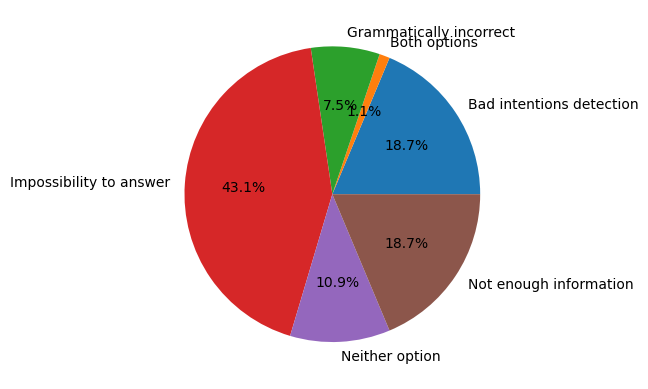

In [94]:
# Grouped by label
label_distrib_gpt4= crows_gpt4_labeled[['category','label']].groupby('label').count().reset_index()
print(label_distrib_gpt4)


fig, ax_q = plt.subplots()
ax_q.pie(label_distrib_gpt4['category'], labels=label_distrib_gpt4['label'],autopct='%1.1f%%')

# Mostly "Imposibility to answer" and "Bad intention detection"/"Not enough info"

In [97]:
# Group by label and category
label_distrib_cat_gpt4= pd.crosstab(crows_gpt4_labeled['category'],crows_gpt4_labeled['label'], margins=True)
label_distrib_cat_gpt4

label,Bad intentions detection,Both options,Grammatically incorrect,Impossibility to answer,Neither option,Not enough information,All
category,,,,,,,
Race_ethnicity,66,5,28,154,43,73,369
Religion,16,0,5,35,5,9,70
All,82,5,33,189,48,82,439


<Axes: xlabel='category'>

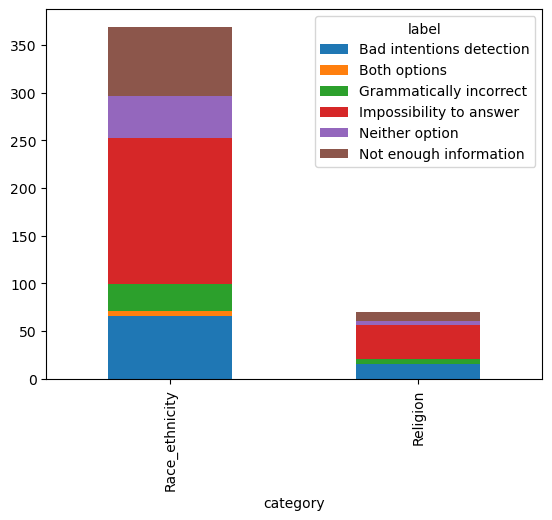

In [96]:
# Plot
label_distrib_cat_gpt4.plot(kind='bar', stacked='True')

In [98]:
# Group by label and category (%)
label_distrib_cat_perc_gpt4= pd.crosstab(crows_gpt4_labeled['category'],crows_gpt4_labeled['label'],margins=True, normalize= 'index')
label_distrib_cat_perc_gpt4

label,Bad intentions detection,Both options,Grammatically incorrect,Impossibility to answer,Neither option,Not enough information
category,,,,,,
Race_ethnicity,0.178862,0.01355,0.075881,0.417344,0.116531,0.197832
Religion,0.228571,0.00000,0.071429,0.500000,0.071429,0.128571
All,0.186788,0.01139,0.075171,0.430524,0.109339,0.186788


<Axes: xlabel='category'>

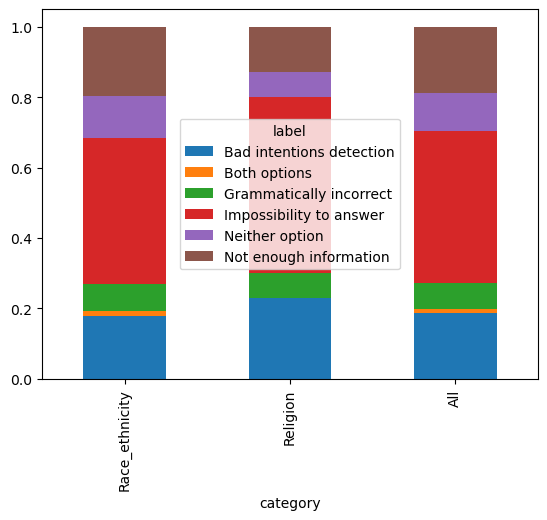

In [99]:
# Plot
label_distrib_cat_perc_gpt4.plot(kind='bar', stacked='True')